In [1]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np

In [2]:
rootdir = '/Data_cfar10'
T = datasets.CIFAR10(rootdir,train=True,download=True)
V = datasets.CIFAR10(rootdir,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
len(T)

50000

In [4]:
len(V)

10000

In [5]:
type(T)

torchvision.datasets.cifar.CIFAR10

In [6]:
X,y = T[12]

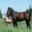

In [7]:
X

In [8]:
T.classes[y]

'horse'

In [9]:
T = datasets.CIFAR10(rootdir,train=True,download=True,transform=transforms.ToTensor())
V = datasets.CIFAR10(rootdir,train=False,download=True,transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [10]:
tl = torch.utils.data.DataLoader(T,batch_size=64,shuffle=True,drop_last=True)
vl = torch.utils.data.DataLoader(V,batch_size=64,shuffle=True,drop_last=True)

In [11]:
model = nn.Sequential(
    nn.Linear(3072,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100,10),
    nn.LogSoftmax(dim=1)
)

In [12]:
loss_fn = nn.NLLLoss()

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [14]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,len(tl))
model.to(device)

Sequential(
  (0): Linear(in_features=3072, out_features=100, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=100, out_features=10, bias=True)
  (4): LogSoftmax(dim=1)
)

In [15]:
nepochs = 200
for e in range(nepochs):
    e_loss = 0
    for X,y in tl:
        X = X.to(device)
        y = y.to(device)
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        e_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(float(e_loss))

1845.229248046875
1799.1053466796875
1799.0830078125
1799.028076171875
1799.0653076171875
1799.0543212890625
1799.1715087890625
1799.1617431640625
1799.1094970703125
1799.168212890625
1799.1160888671875
1799.1197509765625
1799.101806640625
1798.9989013671875


KeyboardInterrupt: 

In [ ]:
t=0
c=0
with torch.no_grad():
    for Xv,yv in vl:
        batch_size = Xv.shape[0]
        y_hat = model(Xv.view(batch_size,-1))
        _,p = torch.max(y_hat,axis=1)
        t += int(yv.shape[0])
        c += int((p==yv).sum())
print(c/t)

In [39]:
vl

In [40]:
a ,b in vl
a

NameError: name 'a' is not defined